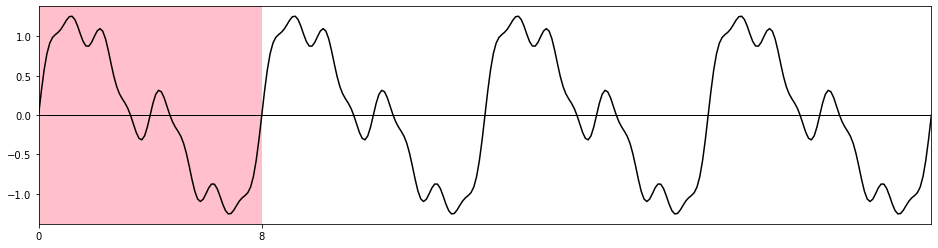

In [231]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib. pyplot as plt
import math

periods = sorted([1,2,4,8])
lcm = math.lcm(*periods)

X = torch.linspace(0, lcm*4, lcm*40+1)
X_components = []
for i in periods:
    X_components.append((X*2*torch.pi/i).sin()*(i/periods[-1]))
Y = sum(X_components)

plt.figure(figsize= (16,4))
plt.plot(X, Y, c='k')
plt.axhline(0, lw=1, c='k')
plt.axvspan(0, lcm, facecolor='pink')
plt.xlim(0, lcm*4)
plt.xticks(range(0, lcm+1, periods[-1]))
plt.show()

In [232]:
from torch.utils.data import Dataset, DataLoader

class TrainDataset(Dataset):
    def __init__(self):
        X = torch.linspace(0, lcm*2, lcm*20+1)
        X_components = []
        for i in periods:
            X_components.append((X*2*torch.pi/i).sin()*(i/periods[-1]))
        Y = sum(X_components)

        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.X) - 101
    
    def __getitem__(self, idx):
        return self.X[idx:idx+50], self.Y[idx+51:idx+101]

In [233]:
from tqdm import tqdm

model = nn.RNN(input_size=50, hidden_size=50, num_layers=2, nonlinearity='tanh')
train_dataset = TrainDataset()

epoch = 40
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.train()
for e in tqdm(range(epoch)):
    for x, y in DataLoader(train_dataset, batch_size=4, shuffle=True):
        optimizer.zero_grad()
        y_hat, *_ = model(x.unsqueeze(1))
        loss = F.mse_loss(y_hat, y.unsqueeze(1))
        loss.backward()
        optimizer.step()

100%|██████████| 40/40 [00:00<00:00, 126.97it/s]


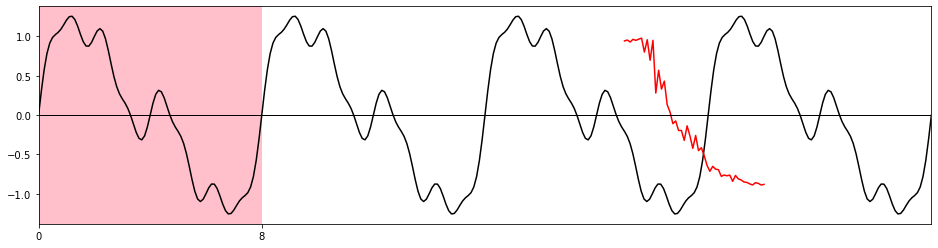

In [234]:
model.eval()

Y_hat, *_ = model(torch.linspace(lcm*2, lcm*2+5, 50).unsqueeze(0))
Y_hat = Y_hat.detach().flatten(0)

plt.figure(figsize= (16,4))
plt.plot(X, Y, c='k')
plt.plot(torch.linspace(lcm*2+5, lcm*2+10, 50), Y_hat, c='r')
plt.axhline(0, lw=1, c='k')
plt.axvspan(0, lcm, facecolor='pink')
plt.xlim(0, lcm*4)
plt.xticks(range(0, lcm+1, periods[-1]))
plt.show()